In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Functions to update and compute the output

In [112]:
def update_network(leaking_rate,X,y_fb,W,Wfb,f, time_constant):
    return (1-leaking_rate*time_constant) * X + time_constant * f(W.dot(X) + Wfb.dot(y_fb))

def compute_output(X,Wout):
    return Wout.T.dot(X)

# Initialization of the network

In [132]:
N = 20
X = np.random.rand(N) - 0.5
W = np.random.rand(N,N) - 0.5
Wbf = (np.random.rand(N,1) - 0.5)
rhoW = np.max(np.abs(np.linalg.eig(W)[0]))
W *= 0.5 / rhoW
leaking_rate = 0.5
time_constant = 0.5

# Objective function

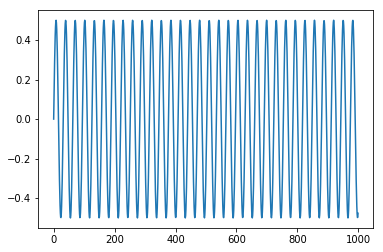

In [133]:
y = (0.5*np.sin(np.asarray(range(1000)) * 0.2)).reshape(1000,1)
_ = plt.plot(range(len(y)),y)

# Training
+ 100 iterations are executed without recording, to replace the initial conditions
+ Record the answers during 200 iterations 

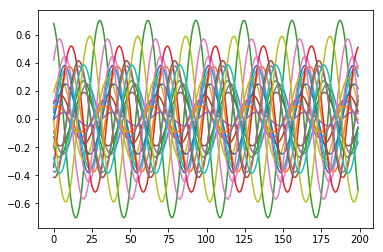

In [134]:
X_full = np.ones((200,N))
for i in range(100):
    X = update_network(leaking_rate,X,y[i],W,Wbf,np.tanh,time_constant)

for i in range(200):
    X_full[i,:] = X
    X = update_network(leaking_rate,X,y[i+100],W,Wbf,np.tanh,time_constant)
_=plt.plot(pd.DataFrame(X_full))

# Use pseudo inverse to compute $W^{out}$

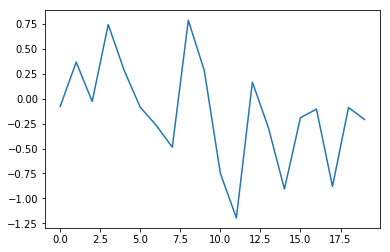

In [135]:
Wout = np.linalg.pinv(X_full).dot(y[100:300,:])
_=plt.plot(pd.DataFrame(Wout))

# plot objective function and predicted function

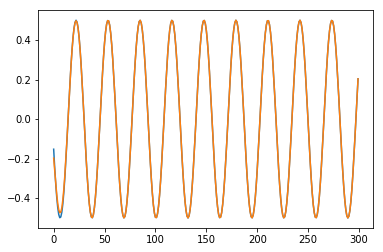

In [136]:
ans = []
for i in range(300):
    X = update_network(leaking_rate,X,y[i+300-1],W,Wbf,np.tanh, time_constant)
    ans.append(compute_output(X,Wout))

_ = plt.plot(range(300),y[300:600])
_ = plt.plot(range(300),ans)


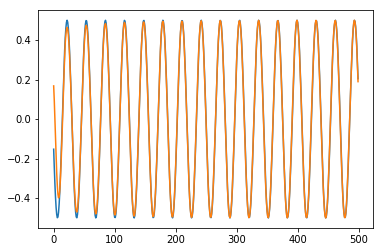

In [137]:
ans = []
test_size = 500
training_size = 200
rest_size = 100
for i in range(test_size):
    if i < 20:
        X = update_network(leaking_rate,X,y[i+training_size+rest_size-1],W,Wbf,np.tanh, time_constant)
    else:
        X = update_network(leaking_rate,X,ans[i-1],W,Wbf,np.tanh,time_constant)
    ans.append(compute_output(X,Wout))

_ = plt.plot(range(test_size),y[training_size+rest_size:training_size+rest_size+test_size])
_ = plt.plot(range(test_size),ans)